<a href="https://colab.research.google.com/github/AyushBhatt99/Short-term-Load-Forecasting/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/code1xls.csv')
data= df.copy()
# data

In [3]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

In [4]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']])
df

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
Datetime,,,,,,
2015-01-03 01:00:00,0.187760,0.635452,0.039874,0.574051,0.0,0.405506
2015-01-03 02:00:00,0.190769,0.643650,0.040475,0.582367,0.0,0.354284
2015-01-03 03:00:00,0.194136,0.655863,0.038162,0.589935,0.0,0.343800
2015-01-03 04:00:00,0.195930,0.668890,0.040118,0.580883,0.0,0.334717
2015-01-03 05:00:00,0.197373,0.678600,0.042601,0.556587,0.0,0.338003
...,...,...,...,...,...,...
2016-08-07 07:00:00,0.334759,0.838432,0.187105,0.170968,0.0,0.383495
2016-08-07 08:00:00,0.386332,0.806729,0.212835,0.186578,0.0,0.425854
2016-08-07 09:00:00,0.425244,0.784792,0.235555,0.183428,0.0,0.458467


In [5]:
df.isna().sum()


temp_2M             0
humidity_2M         1
precipitation_2M    1
wind_speed_2M       1
holiday             1
net_demand          1
dtype: int64

**USING LINEAR REGRESSION MODEL**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
# print(X)
# print(y);

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [10]:
y_test

array([0.84296268, 0.37063158, 0.86036799, ..., 0.6536407 , 0.59911882,
       0.7526222 ])

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.impute import SimpleImputer

# Create an imputer with strategy='mean' (you can also use 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform X_test
X_test_imputed = imputer.fit_transform(X_test)

# Predict using the imputed X_test
y_pred = regressor.predict(X_test_imputed)


In [14]:

y_pred

array([0.71347754, 0.47008196, 0.66501177, ..., 0.52519597, 0.5684332 ,
       0.60366395])

In [15]:

# print(y_test)

In [21]:
from sklearn.metrics import r2_score

# Check for NaN values in y_test and y_pred
nan_indices_y_test = np.isnan(y_test)
nan_indices_y_pred = np.isnan(y_pred)

# Remove NaN values from y_test and y_pred
y_test_clean = y_test[~nan_indices_y_test]
y_pred_clean = y_pred[~nan_indices_y_test]  # Assuming indices match

# Calculate R-squared only if there are no NaN values
if not np.any(nan_indices_y_test) and not np.any(nan_indices_y_pred):
    r2 = r2_score(y_test_clean, y_pred_clean)
    print('r2_score:', r2)
else:
    print("NaN values detected. Handle them appropriately.")



NaN values detected. Handle them appropriately.


In [23]:
r2_score(y_test_clean,y_pred_clean )
print('r2_score:',r2_score(y_test_clean,y_pred_clean ))


r2_score: 0.57237418177877


In [25]:
rmse = mean_squared_error(y_test_clean, y_pred_clean, squared=False)
print('rmse:',rmse)

rmse: 0.11141580548885528


In [26]:
df['net_demand'].mean()
print('Mean of all net demands given in last column:',df['net_demand'].mean())

Mean of all net demands given in last column: 0.5590669187586821


In [27]:
error_percent = (rmse/df['net_demand'].mean())*100
print('error_percent:',error_percent)

error_percent: 19.928885389290446


In [28]:
# Calculate the absolute errors
errors = abs(y_pred_clean -y_test_clean)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test_clean)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.09
Accuracy: 82.4 %.


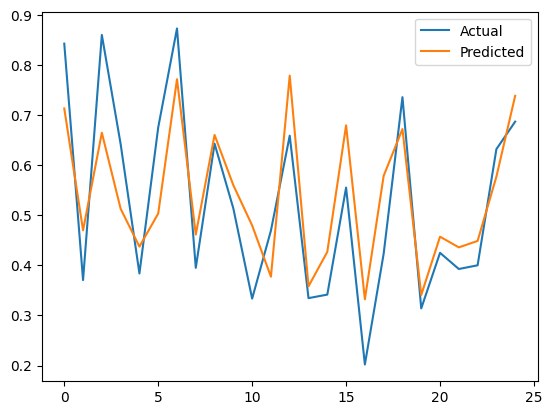

In [29]:
plt.plot(y_test_clean[0:25], label='Actual')
plt.plot(y_pred_clean[0:25], label='Predicted')
plt.legend()
plt.show()

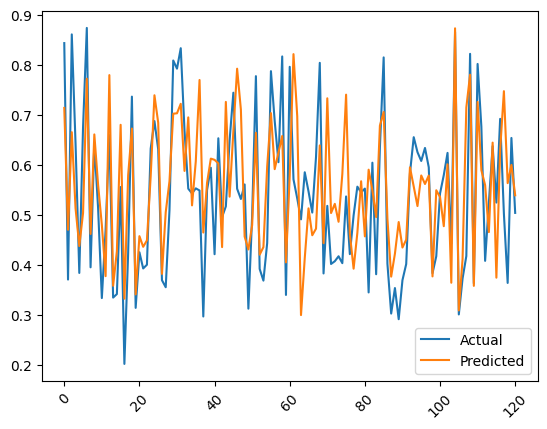

In [30]:
plt.plot(y_test_clean[0:121], label='Actual')
plt.plot(y_pred_clean[0:121], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()